In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Concrete_Data_Yeh.csv")

In [3]:
dataset.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
dataset.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
corr_matrix = dataset.corr()
corr_matrix["csMPa"].sort_values(ascending=False)

csMPa               1.000000
cement              0.497832
superplasticizer    0.366079
age                 0.328873
slag                0.134829
flyash             -0.105755
coarseaggregate    -0.164935
fineaggregate      -0.167241
water              -0.289633
Name: csMPa, dtype: float64

/home/blooser/Documents/Anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb1ffe7d68>,
      dtype=object)

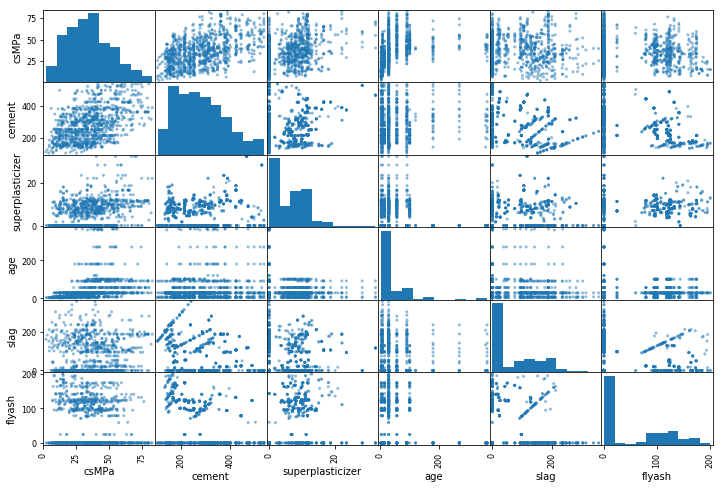

In [7]:
from pandas.tools.plotting import scatter_matrix

attributes = ["csMPa", "cement", "superplasticizer", "age", "slag", "flyash"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

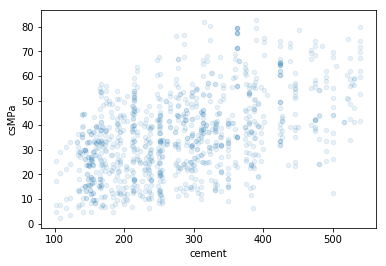

In [8]:
dataset.plot(kind="scatter", y="csMPa", x="cement", alpha=0.1)

In [9]:
from sklearn.preprocessing import Imputer 

imputer = Imputer(strategy="mean")
strength_nums = dataset.iloc[:, [0, 4, 7]]
imputer.fit(strength_nums)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [10]:
imputer.statistics_

array([281.16786408,   6.20466019,  45.66213592])

In [11]:
X = imputer.transform(strength_nums)
y = dataset.iloc[:, 8].values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn.svm import SVR

svr_clf = SVR()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"C": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
     "kernel": ["linear", "rbf"],
     "gamma": ["auto", 6, 3, 12, 55, 100]}
]

grid_search = GridSearchCV(svr_clf, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['auto', 6, 3, 12, 55, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
grid_search.best_params_

{'C': 10, 'gamma': 3, 'kernel': 'rbf'}

In [18]:
svr_clf = SVR(C=10, gamma=3, kernel="rbf")
svr_clf.fit(X_train, y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=3,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
from sklearn.metrics import mean_squared_error

y_train_pred_test = svr_clf.predict(X_test)
np.sqrt(mean_squared_error(y_train_pred_test, y_test))

8.748226569881574

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svr_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
scores = np.sqrt(-scores)

In [21]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std:", scores.std())

In [22]:
display_scores(scores)

Scores: [9.97054049 9.48174531 9.11320865 7.7667025  8.31999122 8.59406019
 8.60162603 8.74207478 7.86478138 7.84590023]
Mean: 8.6300630785158
Std: 0.693716579879054


In [37]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svr_clf, X_train, y_train, cv=9)
np.sqrt(mean_squared_error(y_train_pred, y_train))

8.680651857971862